# Multi-Dimensional Scaling (MDS) 란? 
- MDS는 객체 셋 간의 비유사도 또는 거리를 표현하는 시각화 방법 
- 여기서 객체란 색깔, 얼굴, 지도, 정치적 성향 등이 가능 
- MDS는 차이를 그래프의 거리로 해석할 뿐만 아니라 고차원 데이터에 대한 차원 축소 기법으로도 사용 가능 
- MDS의 주요 목적은 축소된 차원에서 기존차원에서의 거리, 비유사성을 최대한 유지하는 것 
- Distance는 유클리디안 거리를 기본적으로 사용 


# 1. 간단한 예시 
- 각 도시별 거리 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cities = {'Istanbul':[0,350,329,360,483,1048],
          'Ankara':[350,0,522,405,387,719],
          'Izmir':[329,522,0,186,359,1231],
          'Denizli':[360,405,186,0,174,1082],
          'Antalya':[483,387,359,174,0,981],
          'Erzurum':[1048,719,1231,1082,981,0],
          }
df = pd.DataFrame(cities, index =['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum'])
df

,Istanbul,Ankara,Izmir,Denizli,Antalya,Erzurum
Istanbul,0,350,329,360,483,1048
Ankara,350,0,522,405,387,719
Izmir,329,522,0,186,359,1231
Denizli,360,405,186,0,174,1082
Antalya,483,387,359,174,0,981
Erzurum,1048,719,1231,1082,981,0


c:\Users\dags8\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


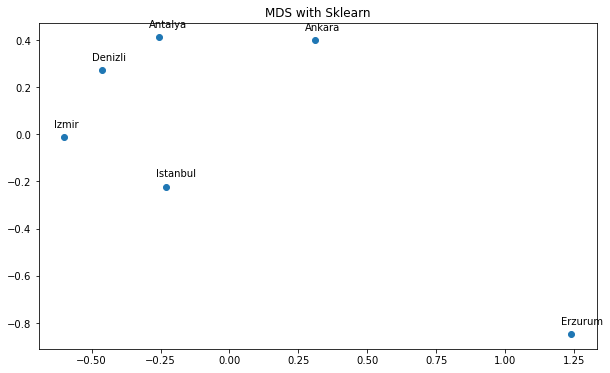

0.18516877484412345


In [1]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)


from sklearn.manifold import MDS
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(x_scaled)
cities = ['Istanbul','Ankara','Izmir','Denizli','Antalya','Erzurum']

plt.figure(figsize=(10,6))
plt.scatter(x_sklearn[:,0],x_sklearn[:,1])
plt.title('MDS with Sklearn')
for label, x, y in zip(cities, x_sklearn[:, 0], x_sklearn[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()
print(mds_sklearn.stress_)

시각화를 통해 도시 별로 가깝고 먼 곳을 한 눈에 볼 수 있다. 